# K Fold Cross Validation

Sometimes we get into this confusion on which ML model should we use, for example, we worked on this iris flower dataset, now you can classify those flowers using SVM, Logistic regression, Random forest or Decision tree, which mode is the best suited to use?

Cross Validation is a technique which helps you answer this question, it basically allow you to evaluate the model performance,

when you are looking at ML model such as classifying model if its a spasm or not, your typical procedure is, you first train the model, once its build you use another dataset to test the model and your model will return the output then you compare it with the truth to measure the accuracy opf your model.

### Now there are several ways you can perform this training steps:

<b>OPTION 1: </b>
Use all available data for Training and testing on same dataset, basically means train your model with all the data you have, 100% of it and use the same dataset to test it as well

for example in real life, lets say you want to train a kid with 100 maths questions and then when he goes to the exam, you ask the same exact questions you trained him with and then try to measure his maths skill based on the score, Now this is ofc not a good way to measure his skills cuz he already has seen those questions, so what if he get 100 out of 100? these's no point, since he have seen all the questions already during training, basically it will be like an overfit

<b>OPTION 2: </b>
Split available data into Training and Testing dataset.

For example, you will use 80% of your data for Trainig and the remaining 20% for Testing.
We have been usig this Train Test split method

for example in real life, you prepare or train the kid with 80 maths questions the test him with the other 20 questions which he hasnt seen before, so this way you can get a pretty good idea of his skills

But there is a problem with this too, lets say the 70 maths question you training the kid with is all Algebra but the 20 testing question is of Calculus which he havent seen or have knowledge of then he might not perform well

<b>OPTION 3: </b>
and thats why we have K fold cross validation technique.

Now, in this technique what we do is, we divide our 100 samples into folds, so we have 5 folds here each containing 20 samples
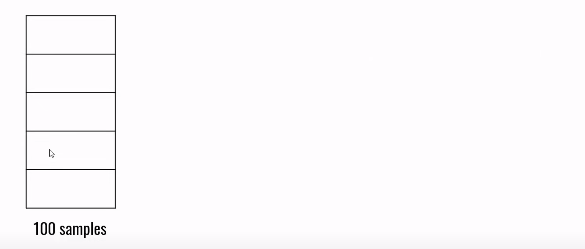
And then you run multiple iterations, the first iteration, you use fold number 2 to 5 for Training the model and the first fold mfor Testing the model and you note down the Score
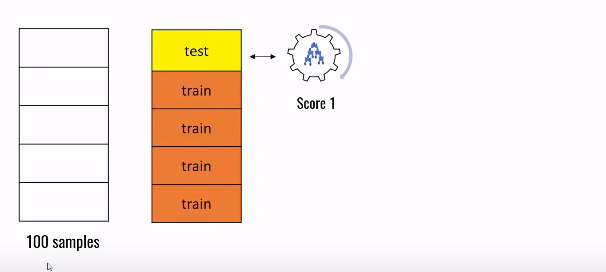
In second iteration, you use 1 fold and 3 to 5th fold for Training and the second fold for Testing and again note down the score
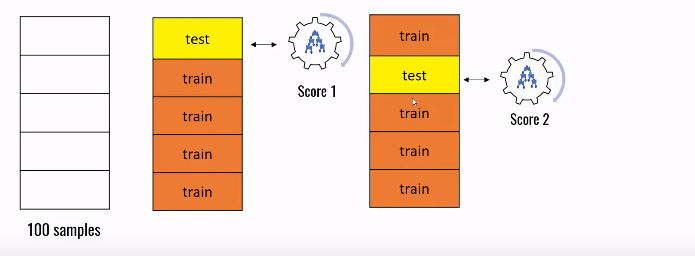
So you repeat this process till the last fold, where you use fold number 5 for Testing the the remaining for Training it and get the score
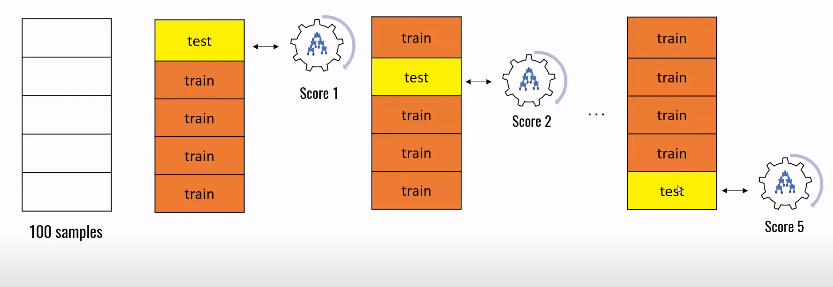
And then once you have these scores, you just Average them out! This technique is very good cuz you are giving variaty of samples to your model and taking the scores and averaging them out



# Coding Part

We will use the digits dataset from SKLearn to classify using different models such as Logistic Regression, SVM and Random Forest classifier and we will evaluate their performance using K fold cross validation

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split

In [64]:
data = load_digits()

In [65]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

# Using Train Test splitting

First we will split our datasets

In [66]:
 X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

### Training and checking scores for each model
Once we done that, now we can use different classifier, first Logistic Regression

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9666666666666667

Now lets try SVM

In [68]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9888888888888889

As you can see SVM performed better, now lets try Random Forest with n_estimator to 40, means 40 deicison tree

In [69]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9833333333333333

As we can see, Random forest performed the best, now this works in a practical situation, but now what happens is, the Distribution of samples in X_train and X_test is not uniform, for example if you run this method one more time, you will the score keep changing cuz its not uniform, the data distribution to Training and Testing set is random hence the performance might also change

So this is the problem with the Train Test split method, you cant just run it one time and say that this particular model is better than the other since it keep changing, you do have to run it multiple times.

# K FOLD
Now lets try using K FOLD

In [70]:
from sklearn.model_selection import KFold

In [71]:
kf = KFold(n_splits=3) # n_splits means specify how many folds you want to create, we will go with 3
kf

KFold(n_splits=3, random_state=None, shuffle=False)

# K FOLD on Dummy dataset
Now, the way you use this K Fold on the dataset is as below..
we use a dummy dataset first 1 to 9

In [72]:
# we now our kfold is ready, its gonna make 3 splits, and we supply 1 to 9 data
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)
    

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


So we can see above, what exactly happening is, the kf.split will return an iterator and that iterator will print train and text index foreach of the iteration, so it divided the data 1-9 into 3 folds, 3 each, in the first iteration it use 1/3 for testing which is [0 1 2] and remaining 2 folds for training which is [3 4 5 6 7 8].
Then in second iteration, it moves [0 1 2] folds into training then [3 4 5] fold into testing and it repeats the procedure like that.


# K FOLD on digit dataset and creating a generic function
Now, we are going to use KFold for our digit example,

So to simplify the things, we will write a generic method or function called get_score() which can take model, X_train, X_test, y_train and y_test as an input or parameters

In [73]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

### Getting each mode score using the function
Above method is powerful, we could have used this method to check the score of those models above, so instead of training and scoring it one by one, you could have used this method by just passing in the model as parameters. for example see below..

In [74]:
get_score(LogisticRegression(), X_train, X_test, y_train, y_test)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9666666666666667

In [75]:
get_score(SVC(), X_train, X_test, y_train, y_test)

0.9888888888888889

In [76]:
get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test)

0.9888888888888889

So, as you can see above, this was way easier.

Now once this method is ready, we are going to use our KFold on our digits datasets

This time we are using Stratified K fold, this is similar to Kfold but it is alittle better in a way that when you are seperating out your fold, it will divide each of the classification categories in a uniform way.

# Stratified K FOLD

In [77]:
from sklearn.model_selection import StratifiedKFold

In [78]:
folds = StratifiedKFold(n_splits=3) # People usually use 10 but to keep it simple we will do 3

Note, that, the above StratifiedKfold method is exactly the same as Kfold method we made earlier above, both are basically the same thing, we are just repeating the same process.

We wil have to prepare our scores array to store the 3 scores in an array for each of the models and use it on our actual digit data this time

# How K FOLD works internally

In [79]:
scores_l = []
scores_svm = []
scores_rf = []
for train_index, test_index in kf.split(data.data):
    X_train, X_test, y_train, y_test = data.data[train_index], data.data[test_index], \
                                    data.target[train_index], data.target[test_index]
    
    # Measure performance of our modelsin each iteration, so since we have 3 folds, this for loop gonna
    # repeat 3 times and each time will take different train and test and meaure the performance then 
    # we will append the scores in those arrays
#     print(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
#     print(get_score(SVC(), X_train, X_test, y_train, y_test))
#     print(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    # Now append them to the lists
    scores_l.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

### Checking each model scores
As you can see above, it gave us three performance score for each model and we appended it to the lists, so now you can just print the list to check the performance of each models in 3 iteration since we specified we want 3 folds

In [80]:
scores_l

[0.9232053422370617, 0.9415692821368948, 0.9148580968280468]

In [81]:
scores_svm

[0.9666110183639399, 0.9816360601001669, 0.9549248747913188]

In [82]:
scores_rf

[0.9382303839732888, 0.9415692821368948, 0.9282136894824707]

So as we can see SVM is performing thr best, but now you can get the average of the three scores in each model and compare which is the best.

So, this is typically how you do it, but luckily, SKLearn comes up with a readymade method already called cross_val_score which you could do the exact same thing we did above using for loop and all. above code is only to understand how it would work behind the scene, but we dont need that much code, just use the "cross_val_cross" method

# Cross Validation

In [83]:
from sklearn.model_selection import cross_val_score

Once imported, you can just call the method with first argument is your model, then second argument is your X and third argument is your y

In [88]:
cross_val_score(SVC(), data.data, data.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [95]:
cross_val_score(RandomForestClassifier(), data.data, data.target, cv=kf)

array([0.93989983, 0.95826377, 0.93155259])

So, internally this method is doing the same thing as the for loop we made above.
You can specify num of folds in "cv" argument, just pass in your Kfold or stratifiedKfold instance there or a number, by default it does 5 folds

## Parameters Tuning
Now we compared differend classifier model, but with this method you can also compare same classifier model but with different parameters, this is known as Parameter Tuning, for example run the same Random Forest model but with differen parameter 

In [96]:
cross_val_score(RandomForestClassifier(), data.data, data.target)

array([0.93055556, 0.89722222, 0.95821727, 0.98050139, 0.92479109])

In [99]:
cross_val_score(RandomForestClassifier(n_estimators=5), data.data, data.target)

array([0.86944444, 0.80833333, 0.87743733, 0.8913649 , 0.86072423])

In [100]:
cross_val_score(RandomForestClassifier(n_estimators=50), data.data, data.target)

array([0.92222222, 0.90555556, 0.96657382, 0.95264624, 0.92479109])

So, as we can see Cross Validation Technique is pretty useful, it not only allow us to compare two or more models but also compare the same model with different parameters!

As we can see, in our case for the digit dataset, SVM is having the best performance, so we will use that for prediction

# Prediction

In [119]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [120]:
predict = model.predict(X_test)

# Confusion Matrix

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predict)

Text(95.72222222222221, 0.5, 'Truth')

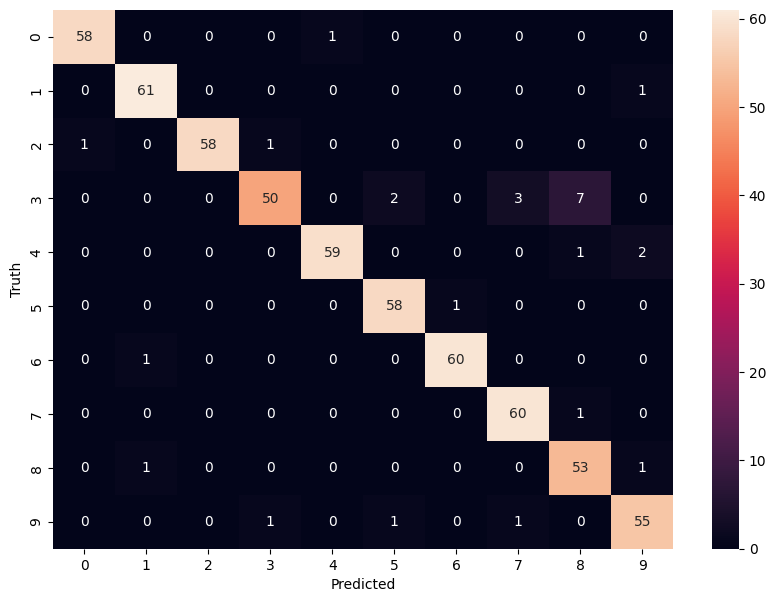

In [122]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Checking count of wrong predictions

In [124]:
count = 0
for i in range(len(predict)):
    if predict[i] != y_test[i]:
        count += 1
print(count)

27
